In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Titanic-Dataset.csv'  # Replace with your file path
titanic_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(titanic_data.head())

# Summary of the dataset
print("\nSummary of the dataset:")
print(titanic_data.info())

# Check for missing values
print("\nMissing values in each column:")
print(titanic_data.isnull().sum())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(titanic_data.describe())


First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/Titanic-Dataset.csv'  # Replace with your file path
titanic_data = pd.read_csv(file_path)

# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.drop(columns=['Cabin'], inplace=True)  # Drop 'Cabin' column

# Convert categorical variables to numerical representations (One-hot encoding)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop irrelevant columns
titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Normalize or scale numeric features
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Display the preprocessed dataset
print("Preprocessed dataset:")
print(titanic_data.head())


Preprocessed dataset:
   Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0         0       3 -0.565736      1      0 -0.502445      True       False   
1         1       1  0.663861      1      0  0.786845     False       False   
2         1       3 -0.258337      0      0 -0.488854     False       False   
3         1       1  0.433312      1      0  0.420730     False       False   
4         0       3  0.433312      0      0 -0.486337      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


<ipython-input-3-a3a3aaef68ea>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
<ipython-input-3-a3a3aaef68ea>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [ ]:
from sklearn.model_selection import train_test_split

# Separate the target variable (Survived) from the features
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (712, 8)
Testing features shape: (179, 8)
Training labels shape: (712,)
Testing labels shape: (179,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the evaluation metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)


Model Performance:
Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1 Score: 0.76

Confusion Matrix:
[[90 15]
 [19 55]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}  # Example for Logistic Regression
grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)


Best Parameters: {'C': 0.1}
Best Cross-Validation Score: 0.7962868117797696


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.82517483 0.83216783 0.83098592 0.80985915 0.79577465]
Mean Accuracy: 0.8187924751305033


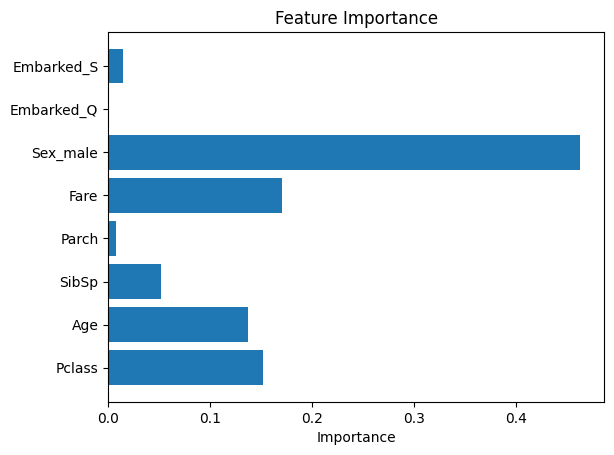

In [ ]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
plt.barh(X_train.columns, feature_importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


In [ ]:
pip install shap


In [ ]:
print(X_train.dtypes)


Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [ ]:
# Apply one-hot encoding if necessary
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns in train and test sets (important if there are mismatched columns after encoding)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1)
X_test_encoded.fillna(0, inplace=True)  # Fill any missing columns with 0


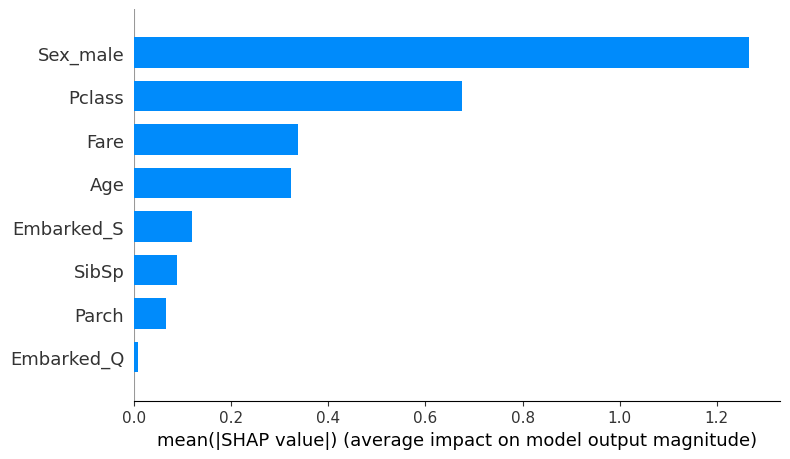

In [ ]:
import pandas as pd
import shap
from sklearn.preprocessing import OneHotEncoder

# Assuming X_train contains categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create a OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for SHAP compatibility

# Fit and transform the categorical features in X_train
encoded_data_train = encoder.fit_transform(X_train[categorical_features])

# Create a DataFrame from the encoded data
encoded_df_train = pd.DataFrame(encoded_data_train, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical features and concatenate encoded features to X_train
X_train_encoded = X_train.drop(columns=categorical_features).reset_index(drop=True)
X_train_encoded = pd.concat([X_train_encoded, encoded_df_train], axis=1)

# Transform the categorical features in X_test using the same fitted encoder
encoded_data_test = encoder.transform(X_test[categorical_features])

# Create a DataFrame from the encoded data
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical features and concatenate encoded features to X_test
X_test_encoded = X_test.drop(columns=categorical_features).reset_index(drop=True)
X_test_encoded = pd.concat([X_test_encoded, encoded_df_test], axis=1)

# Ensure all columns are numeric
X_train_encoded = X_train_encoded.astype(float)
X_test_encoded = X_test_encoded.astype(float)

# Now initialize the explainer and compute SHAP values
explainer = shap.Explainer(model, X_train_encoded)
shap_values = explainer(X_test_encoded)

# Summary plot
shap.summary_plot(shap_values, X_test_encoded, plot_type="bar")

In [ ]:
shap_values = explainer(X_test_encoded.sample(100, random_state=42))


In [ ]:
import matplotlib.pyplot as plt
shap.summary_plot(shap_values, X_test_encoded, plot_type="bar", show=False)
plt.savefig("shap_summary.png", bbox_inches="tight")
plt.close()


In [ ]:
from google.colab import files
files.download("shap_summary.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>